In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

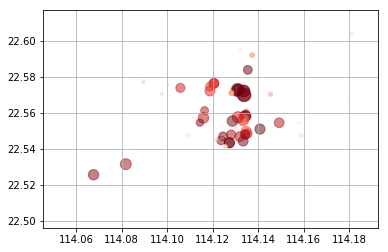

In [25]:
data =pd.read_csv('深圳罗湖二手房信息.csv',engine='python')
plt.scatter(data['经度'],data['纬度'],
           s = data['房屋单价']/500,
           c = data['参考总价'],
           alpha=0.5,cmap='Reds')
plt.grid()


In [18]:
def d_range(df,*cols):
    list1 = []
    for col in cols:
        df_m = df[col].max() - df[col].min()
        list1.append(df_m)
    return (list1)

key1 = '参考首付'
key2 = '参考总价'
dr = d_range(data,key1,key2)
print(dr)

[52.5, 175.0]


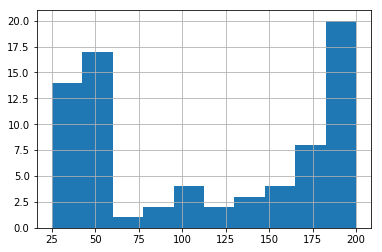

In [19]:
data[key2].hist(bins=10)

In [26]:
gcut = pd.cut(data[key2],10,right=False)
gcut_count = gcut.value_counts(sort=False)
data['参考总价分组区间'] = gcut.values

data.head()

,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度,参考总价分组区间
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698,"[42.5, 60.0)"
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910,"[25.0, 42.5)"
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223,"[42.5, 60.0)"
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343,"[25.0, 42.5)"
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370,"[165.0, 182.5)"


In [36]:
r_zj = pd.DataFrame(gcut_count)
r_zj.rename(columns={gcut_count.name:'频数'},inplace=True)
r_zj['频率'] = r_zj/r_zj['频数'].sum()
r_zj['累积频率'] = r_zj['频率'].cumsum()
r_zj['频率%'] = r_zj['频率'].apply(lambda x: '%.2f%%' %(x*100))
r_zj['累积频率%'] = r_zj['累积频率'].apply(lambda x: '%.2f%%' %(x*100))

print(type(r_zj))
print(r_zj.dtypes)
r_zj.style.bar(subset=['频率','累积频率'],color='#d65f5f',width=100)


<class 'pandas.core.frame.DataFrame'>
频数         int64
频率       float64
累积频率     float64
频率%       object
累积频率%     object
dtype: object


,频数,频率,累积频率,频率%,累积频率%
"[25.0, 42.5)",14,0.186667,0.186667,18.67%,18.67%
"[42.5, 60.0)",17,0.226667,0.413333,22.67%,41.33%
"[60.0, 77.5)",1,0.0133333,0.426667,1.33%,42.67%
"[77.5, 95.0)",2,0.0266667,0.453333,2.67%,45.33%
"[95.0, 112.5)",4,0.0533333,0.506667,5.33%,50.67%
"[112.5, 130.0)",2,0.0266667,0.533333,2.67%,53.33%
"[130.0, 147.5)",3,0.04,0.573333,4.00%,57.33%
"[147.5, 165.0)",4,0.0533333,0.626667,5.33%,62.67%
"[165.0, 182.5)",8,0.106667,0.733333,10.67%,73.33%
"[182.5, 200.175)",20,0.266667,1,26.67%,100.00%


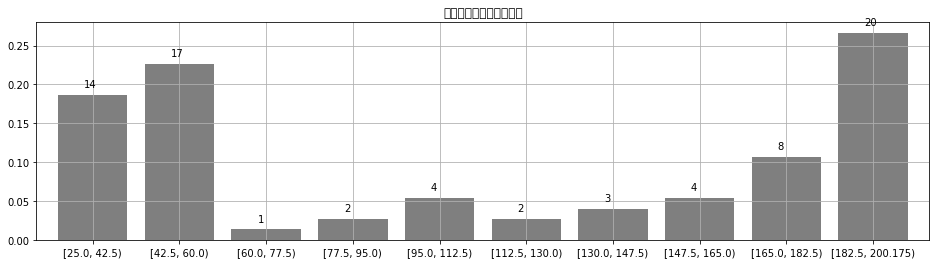

In [45]:
r_zj['频率'].plot(kind='bar',
               width=0.8,
               figsize=(16,4),
               rot=0,
               color='k',
               grid=True,
               alpha=0.5)
plt.title('参考总价分布频率直方图')

x = len(r_zj)
y = r_zj['频率']
z = r_zj['频数']

for i,j,k in zip(range(x),y,z):
    plt.text(i-0.1,j+0.01,'%i' % k,color='k')

In [51]:
cx_g = data['朝向'].value_counts()
r_cx = pd.DataFrame(cx_g)
print(r_cx)

    朝向
南北  29
南   20
东    8
东南   5
北    4
西南   4
西北   3
东北   1
东西   1


In [61]:
r_cx['频率'] = r_cx/r_cx['朝向'].sum()
r_cx['频率%'] = r_cx['频率'].apply(lambda x: '%.2f%%' %(x*100))
r_cx['累积频率'] = r_cx['频率'].cumsum()
r_cx['累积频率%']= r_cx['累积频率'].apply(lambda x: '%.2f%%' %(x*100))
r_cx                               

,朝向,频率,频率%,累积频率,累积频率%
南北,29,0.386667,38.67%,0.386667,38.67%
南,20,0.266667,26.67%,0.653333,65.33%
东,8,0.106667,10.67%,0.760000,76.00%
东南,5,0.066667,6.67%,0.826667,82.67%
北,4,0.053333,5.33%,0.880000,88.00%
西南,4,0.053333,5.33%,0.933333,93.33%
西北,3,0.040000,4.00%,0.973333,97.33%
东北,1,0.013333,1.33%,0.986667,98.67%
东西,1,0.013333,1.33%,1.000000,100.00%


(-1.1101621526291232,
 1.1004839130571389,
 -1.1062755172910221,
 1.1205348076125872)

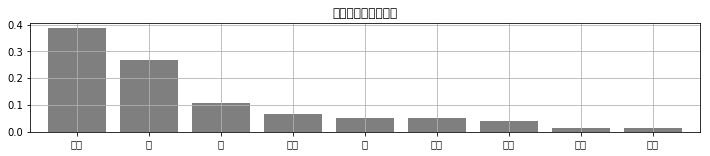

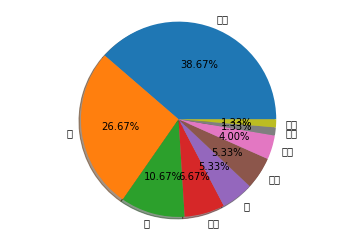

In [71]:
plt.figure(num=1,figsize=(12,2))
r_cx['频率'].plot(kind='bar',
               width=0.8,
               rot=0,
               color='k',
               grid=True,
               alpha=0.5)
plt.title('朝向频率分布直方图')

plt.figure(num=2)
plt.pie(r_cx['朝向'],
       labels=r_cx.index,
       autopct='%.2f%%',shadow=True)
plt.axis('equal')

                A_sale      B_sale
2018-01-01  353.448397  310.475430
2018-01-02   61.125147  729.202221
2018-01-03  219.146016  272.793976
2018-01-04  843.505282  857.880063
2018-01-05  481.849480  866.883662


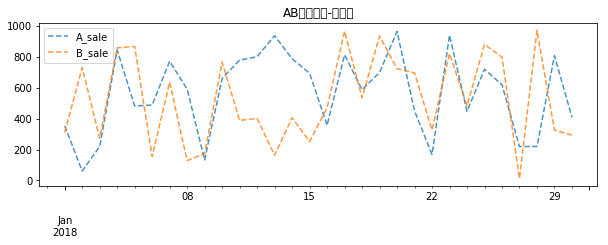

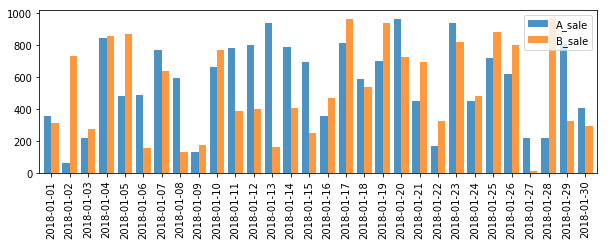

In [74]:
data = pd.DataFrame(np.random.rand(30,2)*1000,
                   columns = ['A_sale','B_sale'],
                   index = pd.period_range('20180101','20180130'))
print(data.head())

data.plot(kind='line',
         style='--',
         alpha=0.8,
         figsize=(10,3),
         title='AB产品对比-折线图')

data.plot(kind='bar',
         width=0.8,
         alpha=0.8,
         figsize=(10,3))

[Text(0,0,'2018-01-01'),
 Text(0,0,'2018-01-07'),
 Text(0,0,'2018-01-13'),
 Text(0,0,'2018-01-19'),
 Text(0,0,'2018-01-25')]

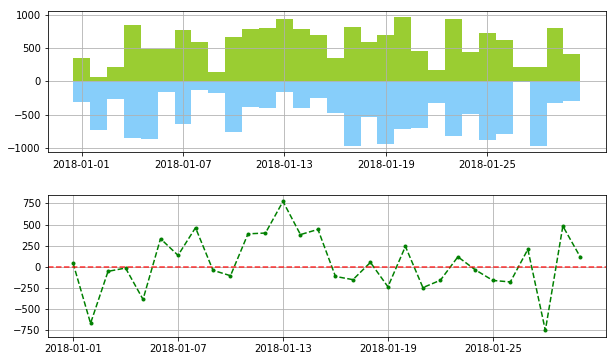

In [83]:
fig3 = plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace=0.3)

ax1 = fig3.add_subplot(2,1,1)
x = range(len(data))
y1 = data['A_sale']
y2 = -data['B_sale']
plt.bar(x,y1,width=1,facecolor='yellowgreen')
plt.bar(x,y2,width=1,facecolor='lightskyblue')
plt.grid()
plt.xticks(range(0,30,6))
ax1.set_xticklabels(data.index[::6])



ax2 = fig3.add_subplot(2,1,2)
y3 = data['A_sale'] - data['B_sale']
plt.plot(x,y3,'--g.')
plt.axhline(0,hold=None,color='r',linestyle='--',alpha=0.8)
plt.grid()
plt.xticks(range(0,30,6))
ax2.set_xticklabels(data.index[::6])

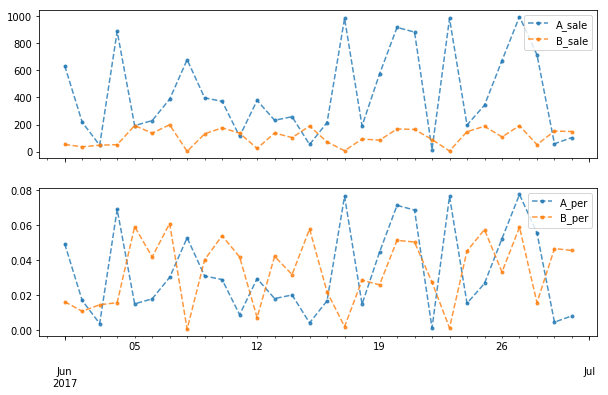

In [90]:
data = pd.DataFrame({'A_sale':np.random.rand(30)*1000,
                   'B_sale':np.random.rand(30)*200},
                   index=pd.period_range('20170601','20170630'))


data['A_per'] = data['A_sale']/data['A_sale'].sum()
data['B_per'] = data['B_sale']/data['B_sale'].sum()

data['A_per%'] = data['A_per'].apply(lambda x:'%.2f%%' % (x*100))
data['B_per%'] = data['B_per'].apply(lambda x:'%.2f%%' % (x*100))

data.head()

fig,axes = plt.subplots(2,1,figsize=(10,6),sharex=True)
data[['A_sale','B_sale']].plot(kind='line',style='--.',alpha=0.8,ax=axes[0])
axes[0].legend(loc='upper right')

data[['A_per','B_per']].plot(kind='line',style='--.',alpha=0.8,ax=axes[1])
axes[1].legend(loc='upper right')

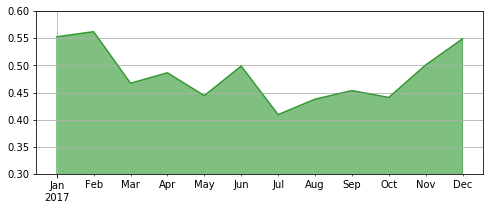

In [101]:
data = pd.DataFrame({'consumption':np.random.rand(12)*1000+2000,'salary':np.random.rand(12)*500+5000},
                       index=pd.period_range('2017/1','2017/12',freq='M'))


data['c_s'] = data['consumption'] / data['salary'] 
data.head()

data['c_s'].plot.area(color='green',alpha=0.5,ylim=[0.3,0.6],figsize=(8,3),grid=True)

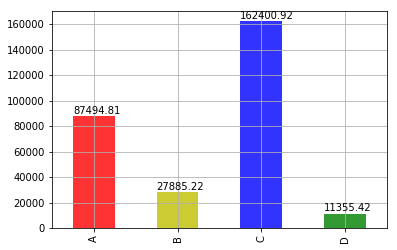

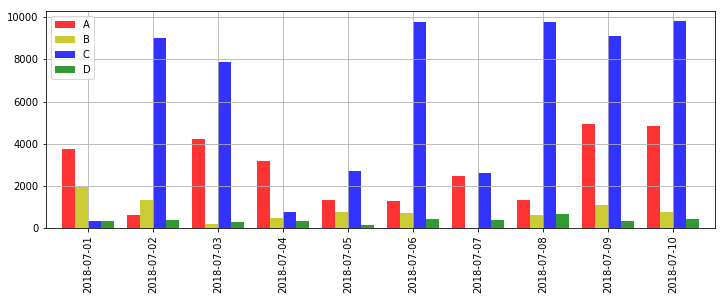

In [109]:
data =pd.DataFrame({
    'A':np.random.rand(30)*5000,
     'B':np.random.rand(30)*2000,
     'C':np.random.rand(30)*10000,
     'D':np.random.rand(30)*800,
},index=pd.period_range('20180701','20180730'))

data.sum().plot(kind='bar',color=['r','y','b','g'],alpha=0.8,grid=True)
for i,j in zip(range(4),data.sum()):
    plt.text(i-0.25,j+2000,'%.2f' % j,color='k')
    
data[:10].plot(kind='bar',color=['r','y','b','g'],alpha=0.8,grid=True,figsize=(12,4),width=0.8)

                      A  base     l_growth     r_growth   pgrowth   zgrowth
2018-07-01  1114.440783  1000   114.440783     0.000000  0.114441       NaN
2018-07-02  2737.598954  1000  1737.598954  1623.158171  1.737599  1.456478
2018-07-03  2017.197572  1000  1017.197572  -720.401382  1.017198 -0.263151
2018-07-04  2346.269204  1000  1346.269204   329.071632  1.346269  0.163133
2018-07-05  2579.679485  1000  1579.679485   233.410281  1.579679  0.099481


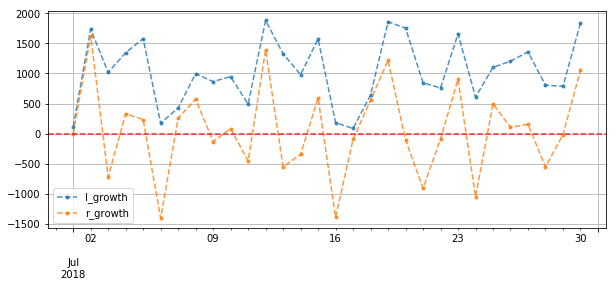

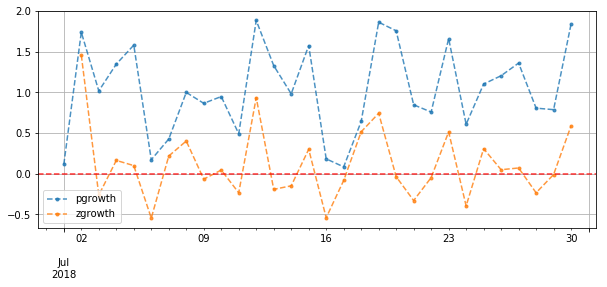

In [118]:
data = pd.DataFrame({
    'A':np.random.rand(30)*2000+1000
},index=pd.period_range('20180701','20180730'))

data['base'] = 1000
data['l_growth'] = data['A'] - data['base']
data['r_growth'] = data['A'] - data.shift(1)['A']

data[data.isnull()] = 0

data[['l_growth','r_growth']].plot(figsize=(10,4),style='--.',alpha=0.8)
plt.axhline(0,hold=None,color='r',linestyle='--',alpha=0.8)
plt.legend(loc='lower left')
plt.grid()

data['pgrowth'] = data['l_growth'] / data['base']
data['zgrowth'] = data['r_growth'] / data.shift(1)['A']

data[['pgrowth','zgrowth']].plot(figsize=(10,4),style='--.',alpha=0.8)
plt.axhline(0,hold=None,color='r',linestyle='--',alpha=0.8)
plt.legend(loc='lower left')
plt.grid()

print(data.head())